# Task 2 

## Credit / Home Loans - AutoML vs Bespoke ML

Standard Bank is embracing the digital transformation wave and intends to use new and exciting technologies to give their customers a complete set of services from the convenience of their mobile devices.
As Africa’s biggest lender by assets, the bank aims to improve the current process in which potential borrowers apply for a home loan. The current process involves loan officers having to manually process home loan applications. This process takes 2 to 3 days to process upon which the applicant will receive communication on whether or not they have been granted the loan for the requested amount.
To improve the process Standard Bank wants to make use of machine learning to assess the credit worthiness of an applicant by implementing a model that will predict if the potential borrower will default on his/her loan or not, and do this such that the applicant receives a response immediately after completing their application. 

The data science lifecycle (https://www.datascience-pm.com/crisp-dm-2/) includes:

- Business Understanding
- Data Understanding
- Data Preparation
- Modelling
- Evaluation
- Deployment.

The data provided can be found in the Resources folder as well as (https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset).

- train will serve as the historical dataset that the model will be trained on and,
- test will serve as unseen data we will predict on, i.e. new ('future') applicants.

### Part One

There are many AutoEDA Python libraries out there which include:

- dtale (https://dtale.readthedocs.io/en/latest/)
- pandas profiling (https://pandas-profiling.ydata.ai/docs/master/index.html)
- autoviz (https://readthedocs.org/projects/autoviz/)
- sweetviz (https://pypi.org/project/sweetviz/)

and many more. In this task we will use Sweetviz.. You may be required to use bespoke EDA methods.

The Home Loans Department manager wants to know the following:

1. An overview of the data. (HINT: Provide the number of records, fields and their data types. Do for both).

2. What data quality issues exist in both train and test? (HINT: Comment any missing values and duplicates)

3. How do the the loan statuses compare? i.e. what is the distrubition of each?

4. How do women and men compare when it comes to defaulting on loans in the historical dataset?

5. How many of the loan applicants have dependents based on the historical dataset?

6. How do the incomes of those who are employed compare to those who are self employed based on the historical dataset? 

7. Are applicants with a credit history more likely to default than those who do not have one?

8. Is there a correlation between the applicant's income and the loan amount they applied for? 

### Part Two

- Machine Learning Model Building: 
1) Auto ML

2) - Data Preprocessing 

   - Model Building on various algorithm





## Import Libraries




In [1]:
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

In [4]:
# !pip install sweetviz 
#uncomment the above if you need to install the library 
#!pip install auto-sklearn

In [5]:
#!pip install --upgrade scipy

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz 
#import autosklearn.classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

## Import Datasets

In [4]:
train = pd.read_csv('C:/Users/hp/Downloads/loan_dataset.csv')
test = pd.read_csv('C:/Users/hp/Downloads/test(2).csv')

In [5]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Part One

## EDA

In [6]:
train.head()
train.shape

(614, 13)

In [7]:
test.head()
test.shape

(367, 12)

In [8]:
# we concat for easy analysis
n = train.shape[0] # we set this to be able to separate the
df = pd.concat([train, test], axis=0)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Sweetviz

autoEDA = sweetviz.analyze(train)
autoEDA.show_notebook()

### Your Own EDA 


#### 1. An overview of the data. (HINT: Provide the number of records, fields and their data types. Do for both).

In [40]:
# information about train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [41]:
# Information about test data
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


#### 2. What data quality issues exist in both train and test? (HINT: Comment any missing values and duplicates)

#### Missing , Duplicates values

In [12]:
train.isna().sum()   # i.e both train & test set contains this missing values
test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [10]:
#train.duplicated
df.duplicated().sum()         # No duplicates values 

0

In [13]:
# MISSING VALUES in train data 
l= ['Gender','Married','Dependents','Self_Employed','Self_Employed','LoanAmount','Loan_Amount_Term']
for i in l:
    print(f'Missing values of {i}: {df[i].isna().sum()}')

Missing values of Gender: 24
Missing values of Married: 3
Missing values of Dependents: 25
Missing values of Self_Employed: 55
Missing values of Self_Employed: 55
Missing values of LoanAmount: 27
Missing values of Loan_Amount_Term: 20


#### 3. How do the the loan statuses compare? i.e. what is the distrubition of each?

In [34]:
# again write code for percent distribution
status_Y= train.loc[train.Loan_Status== 'Y',['Loan_Status']].count()
total_count= train.loc[:, ['Loan_Status']].count()

percent_Y= (status_Y/total_count)* 100
print(f'Percentage of Y loan_status in dataset is: {round(percent_Y)}')

Percentage of Y loan_status in dataset is: Loan_Status    69.0
dtype: float64


<AxesSubplot:xlabel='index', ylabel='Loan_Status'>

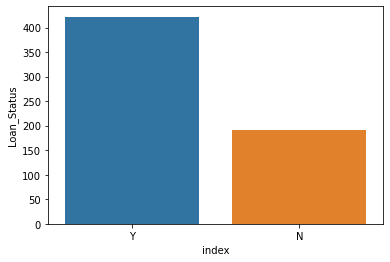

In [45]:
# distribution of Loan_Status as dataframe
status= train.Loan_Status.value_counts().to_frame()
status

# restting colms to Plot distribution
status.reset_index(inplace= True)
sf= status.index.value_counts()
sns.barplot(x='index', y='Loan_Status', data= status)
#plt.pie(x= sf, labels= ['Yes','No'],autopct= ('%.1f%%'),explode= (0.01,0.01))

#### 4. How do women and men compare when it comes to defaulting on loans in the historical dataset?

<AxesSubplot:xlabel='Gender', ylabel='count'>

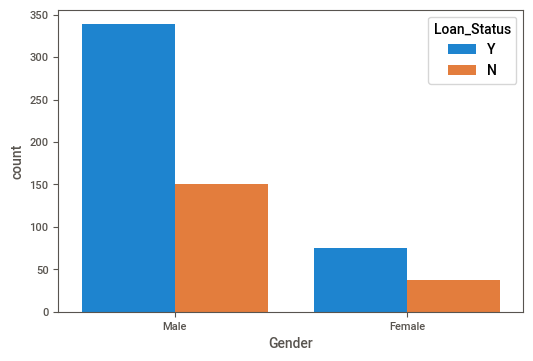

In [8]:


sns.countplot(x='Gender', hue= 'Loan_Status', data= train)
# male applicant are more probable to default although Male applicant are more

#### 5. How many of the loan applicants have dependents based on the historical dataset?

In [46]:

Depndent_applicant=train.loc[train.Dependents!= '0',['Dependents']].count()
print(f'Number applicants having Dependents : {Depndent_applicant}' )

Number applicants having Dependents : Dependents    254
dtype: int64


#### 6. How do the incomes of those who are employed compare to those who are self employed based on the historical dataset?

In [47]:
train.Self_Employed.value_counts()
# There are few self employed applicants

No     500
Yes     82
Name: Self_Employed, dtype: int64

<AxesSubplot:xlabel='Self_Employed', ylabel='ApplicantIncome'>

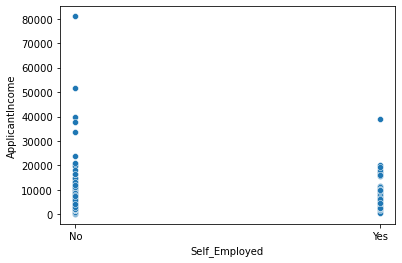

In [53]:
train.head()
#sns.histplot(x= 'ApplicantIncome', hue= 'Self_Employed', data= train)
sns.scatterplot(y=train.ApplicantIncome, x=train.Self_Employed)

# There are few 'EMPLOYED' applicants having much high income(upto 80,000) while most of 'SELF_EMPLOYED' applicants has avg income upto 40,000.

#### 7. Are applicants with a credit history more likely to default than those who do not have one?

In [14]:
train.Credit_History.value_counts()


1.0    475
0.0     89
Name: Credit_History, dtype: int64

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

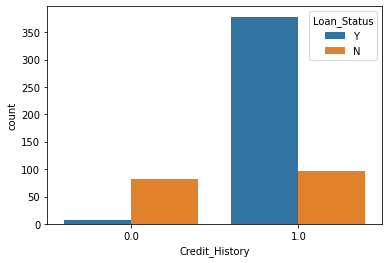

In [19]:
sns.countplot(x= 'Credit_History', hue= 'Loan_Status',data= train)

# Yes,Based on Analysis the applicants with credit history 1 (i.e defaulted) are much higher.

#### 8. Is there a correlation between the applicant's income and the loan amount they applied for? 


In [ ]:
# Yes From Heatmap we find that applicant income has good correlation with LoanAmount
Correlation between(ApplicantIncome & LoanAmount): 0.57

<AxesSubplot:>

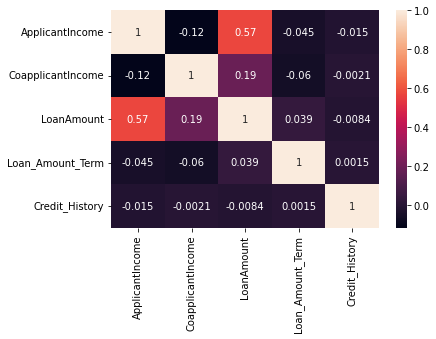

In [31]:
cr= train.corr()
sns.heatmap(cr,annot= True)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

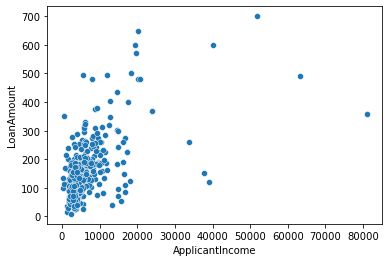

In [54]:
# Scatterplot showing correlation between two features 
sns.scatterplot(x= 'ApplicantIncome',y= 'LoanAmount', data= train)

# Part Two

## Auto ML wth autosklearn


In [ ]:
# Matrix of features

X = train[['Gender',
'Married',
'Dependents',
'Education',
'Self_Employed',
'ApplicantIncome',
'CoapplicantIncome',
'LoanAmount',
'Loan_Amount_Term',
'Credit_History',
'Property_Area']]

# convert string(text) to categorical
X['Gender'] = X['Gender'].astype('category')
X['Married'] = X['Married'].astype('category')
X['Education'] = X['Education'].astype('category')
X['Dependents'] = X['Dependents'].astype('category')
X['Self_Employed'] = X['Self_Employed'].astype('category')
X['Property_Area'] = X['Property_Area'].astype('category')


# label encode target
y = train['Loan_Status'].map({'N':0,'Y':1}).astype(int)


# # train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# train
autoML = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=2*30, per_run_time_limit=30, n_jobs=8) # imposing a 1 minute time limit on this
autoML.fit(X_train, y_train)

# predict
predictions_autoML = autoML.predict(X_test)

In [11]:
print('Model Accuracy:', accuracy_score(predictions_autoML, y_test))

Model Accuracy: 0.7886178861788617


In [12]:
print(confusion_matrix(predictions_autoML, y_test))

[[18  1]
 [25 79]]


## Bespoke ML sklearn

### Data Preparation

#### Matrix of features

In [145]:
# converting laon_amt_term & Credit_history into categoricl datatype

#1st Train set
train.Loan_Amount_Term= train.Loan_Amount_Term.astype('category')
train.Credit_History= train.Credit_History.astype('category')

# Testset
test.Loan_Amount_Term= test.Loan_Amount_Term.astype('category')
test.Credit_History= test.Credit_History.astype('category')

In [146]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Loan_ID            614 non-null    int32   
 1   Gender             614 non-null    int32   
 2   Married            614 non-null    int32   
 3   Dependents         614 non-null    int32   
 4   Education          614 non-null    int32   
 5   Self_Employed      614 non-null    int32   
 6   ApplicantIncome    614 non-null    int64   
 7   CoapplicantIncome  614 non-null    float64 
 8   LoanAmount         614 non-null    float64 
 9   Loan_Amount_Term   614 non-null    category
 10  Credit_History     614 non-null    category
 11  Property_Area      614 non-null    int32   
 12  Loan_Status        614 non-null    int32   
dtypes: category(2), float64(2), int32(8), int64(1)
memory usage: 35.4 KB


#### Handle Missing Values Here ###

In [ ]:
# TRAIN DATA
# Imputing categorical features
train['Gender'].fillna(train.Gender.mode()[0], inplace= True)      
train['Married'].fillna(train.Married.mode()[0], inplace= True)  
train['Dependents'].fillna(train.Dependents.mode()[0], inplace= True)     
train['Self_Employed'].fillna(train.Self_Employed.mode()[0], inplace= True)
train['Loan_Amount_Term'].fillna(train.Loan_Amount_Term.mode()[0], inplace= True)
train['Credit_History'].fillna(train.Credit_History.mode()[0], inplace= True)
# although datatype is float but Credit_History has binary categoricl values

# Numerical features
train['LoanAmount'].fillna(train.LoanAmount.mean(), inplace= True)
# LoanAmount is float datatype and has continuous numericl values. so using median() is a good choice to impute null.

In [ ]:
#TEST DATA
# Imputing categorical features
test['Gender'].fillna(test.Gender.mode()[0], inplace= True)      
#df_categtest['Married'].fillna(method='ffill',inplace=True)  
test['Dependents'].fillna(test.Dependents.mode()[0], inplace= True)     
test['Self_Employed'].fillna(test.Self_Employed.mode()[0], inplace= True)
test['Loan_Amount_Term'].fillna(test.Loan_Amount_Term.mode()[0], inplace= True)
test['Credit_History'].fillna(test.Credit_History.mode()[0], inplace= True)
# although datatype is float but Credit_History has binary categoricl values



# Numerical features
test['LoanAmount'].fillna(test.LoanAmount.mean(), inplace= True)
# LoanAmount is float datatype and has continuous numericl values. so using median() is a good choice to impute null.

In [2]:
### Scale Here ###
# It's preferred to do scaling separately for train & test set to avoid chances of data leakage.
# so we'll do scaling after train/test split.

#### Encoding Categorical features


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

# making list of catgorical features
list_cat= train.select_dtypes(exclude= ['float','int'])

# applying labelencoder on list features of train data
for features in list_cat:
    train[features]= le.fit_transform(train[features].astype(str))

X= train.drop(columns=['Loan_Status','Loan_ID'])
y= train['Loan_Status']

In [155]:
X.shape
y.shape

(614,)

In [191]:
# ENCODING TEST DATA
# making list of catgorical features
list_cat= test.select_dtypes(exclude= ['float','int'])

# applying labelencoder on list features of train data
for features in list_cat:
    test[features]= le.fit_transform(test[features].astype(str))

x_test= test.drop(columns=['Loan_ID'])


In [157]:
X.info() # After categorical features encoding dataset looks like this

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    int32  
 9   Credit_History     614 non-null    int32  
 10  Property_Area      614 non-null    int32  
dtypes: float64(2), int32(8), int64(1)
memory usage: 33.7 KB


#### Train test split

In [158]:
# # train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#### Prepare to scale numerical features

#### Scaling using Standard scaler

In [161]:
# SCALING TRAIN DATA
scale= StandardScaler()

X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [162]:
# SCALING Test DATA
scale= StandardScaler()

x_test= scale.fit_transform(x_test)

In [19]:
# some classifiers you can pick from (remember to import)
import sklearn
classifiers = sklearn.utils.all_estimators(type_filter=None)
for name, class_ in classifiers:
    if hasattr(class_, 'predict_proba'):
        print(name)

AdaBoostClassifier
BaggingClassifier
BayesianGaussianMixture
BernoulliNB
CalibratedClassifierCV
CategoricalNB
ClassifierChain
ComplementNB
DecisionTreeClassifier
DummyClassifier
ExtraTreeClassifier
ExtraTreesClassifier
GaussianMixture
GaussianNB
GaussianProcessClassifier
GradientBoostingClassifier
GridSearchCV
HalvingGridSearchCV
HalvingRandomSearchCV
HistGradientBoostingClassifier
KNeighborsClassifier
LabelPropagation
LabelSpreading
LinearDiscriminantAnalysis
LogisticRegression
LogisticRegressionCV
MLPClassifier
MultiOutputClassifier
MultinomialNB
NuSVC
OneVsRestClassifier
Pipeline
QuadraticDiscriminantAnalysis
RFE
RFECV
RadiusNeighborsClassifier
RandomForestClassifier
RandomizedSearchCV
SGDClassifier
SVC
SelfTrainingClassifier
StackingClassifier
VotingClassifier


#### Importing necessary libraries for Model Building

In [164]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix, plot_confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from sklearn.experimental import enable_hist_gradient_boosting  #enabling experimental feature in environmnt 
from sklearn.ensemble import HistGradientBoostingClassifier

from sklearn.model_selection import GridSearchCV

#### Models with their base Parameter

#### Logistic Regression

In [165]:
# train
logimodel = LogisticRegression() #change model here
logimodel.fit(X_train, y_train)

# predict
predictions_logi = logimodel.predict(X_test)

In [166]:
print('Model Accuracy:', accuracy_score(predictions_logi, y_test))

Model Accuracy: 0.7886178861788617


In [167]:
print(confusion_matrix(predictions_logi, y_test))

[[18  1]
 [25 79]]


#### KNearestNeighbour Classifier

In [168]:
knn= KNeighborsClassifier()
knn.fit(X_train, y_train)

knn_pred= knn.predict(X_test)

In [169]:
print(f'knn_accuracy: {accuracy_score(knn_pred, y_test)}')

knn_accuracy: 0.7398373983739838


In [170]:
print(confusion_matrix(knn_pred, y_test))   # Recall -> 0.74, Precision -> 92.5

[[17  6]
 [26 74]]


#### Decision Tree Classifier

In [171]:
from sklearn.tree import DecisionTreeClassifier

In [172]:
dtree= DecisionTreeClassifier()
dtree.fit(X_train, y_train)

# predict
pred_tree= dtree.predict(X_test)

In [173]:
print(f'Decisiontree_accuracy: {accuracy_score(pred_tree, y_test)}')

Decisiontree_accuracy: 0.6666666666666666


#### Random Forest Classifier

In [175]:
from sklearn.ensemble import RandomForestClassifier

In [176]:
rfmodel= RandomForestClassifier()
rfmodel.fit(X_train, y_train)

# predict
rf_pred= rfmodel.predict(X_test)

In [177]:
print(f'RF_accuracy: {accuracy_score(rf_pred, y_test)}')

RF_accuracy: 0.7642276422764228


#### Adaptive Boosting Classifier

In [178]:
from sklearn.ensemble import AdaBoostClassifier

In [179]:
adamodel= AdaBoostClassifier()
adamodel.fit(X_train, y_train)

ada_pred= adamodel.predict(X_test)

In [180]:
print(f'Adaboost_accuracy: {accuracy_score(ada_pred, y_test)}')

Adaboost_accuracy: 0.7479674796747967


####  Algorithm with best performance on base model

### Logistic Regression 

#### Hyper parameter tuning for logistic regression

In [181]:
from sklearn.model_selection import GridSearchCV

In [182]:
logimodel= LogisticRegression(max_iter= 1000)

penalty= ['l1','l2']
c= (np.logspace(0,5,10))


In [183]:
gridmodel= GridSearchCV(logimodel, param_grid= {'penalty': penalty, 'C': c})

In [184]:
gridmodel.fit(X_train,y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:61

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:61

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:61

GridSearchCV(estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': array([1.00000000e+00, 3.59381366e+00, 1.29154967e+01, 4.64158883e+01,
       1.66810054e+02, 5.99484250e+02, 2.15443469e+03, 7.74263683e+03,
       2.78255940e+04, 1.00000000e+05]),
                         'penalty': ['l1', 'l2']})

In [185]:
gridmodel.best_params_

{'C': 1.0, 'penalty': 'l2'}

In [186]:
logimodel= LogisticRegression(C= 1.0, penalty= 'l2',max_iter= 1000)

In [187]:
logimodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [188]:
y_pred= logimodel.predict(X_test)

In [189]:
# performance metrics for Logistic Regression
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



#### Cross Validation

In [192]:
cross_val_acc= cross_validate(logimodel, X_train, y_train, cv= 10, scoring= ('accuracy') )

In [193]:
scores= pd.DataFrame(cross_val_acc)
scores.mean()
print(f'Mean_Cross_validation accuracy for logistic regression: {(round(scores.test_score.mean(),4))*100}%')

Cross_validation accuracy for logistic regression: 81.07%


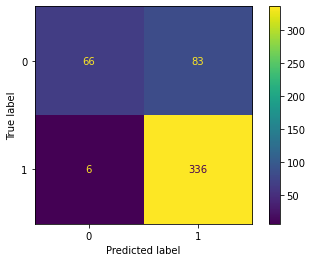

In [196]:
print(plot_confusion_matrix(logimodel,X_train, y_train ))

In [39]:
from sklearn.metrics import roc_curve, auc

In [40]:
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test,predictions_clf )
auc = metrics.auc(fpr1, tpr1)

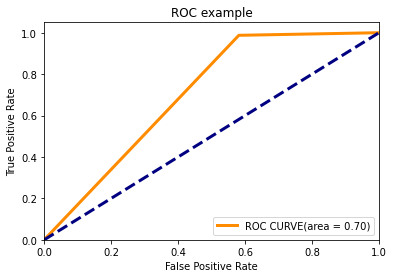

In [41]:
plt.figure()
lw =3 # linewidth
plt.plot(fpr1, tpr1, color = 'darkorange', lw = lw, label = 'ROC CURVE(area = %0.2f)' % auc)
plt.plot([0,1],[0,1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC example')
plt.legend(loc = 'lower right')
plt.show()


#### Final score Logistic Regression cross validation Accuracy : 81.27 % 


#### Finally predicting on test dataset

In [197]:
#predict on test set
logimodel.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,